In [1]:
from datasets import load_dataset, Dataset

from   lcdc import DatasetBuilder, LCDataset
from   lcdc.vars import Variability, TENTH_OF_SECOND
import lcdc.preprocessing as pp
import lcdc.stats as stats

In [2]:
MMT_PATH = "/home/k/kyselica12/work/mmt/MMT"
IDX = 29517
classes = ["H-2A R/B"]
regexes = None
preprocessing = pp.Compose(
    pp.FilterByPeriodicity(Variability.PERIODIC),
    pp.SplitByRotationalPeriod(1), 
    pp.FilterFolded(100, 0.75), 
    pp.FilterMinLength(100),
)
statistics = [
    stats.MediumTime(), 
    stats.MediumPhase(), 
    stats.FourierSeries(8, fs=True, amplitude=True)
]

db = DatasetBuilder(MMT_PATH, norad_ids=[IDX], preprocessing=preprocessing, statistics=statistics, lazy=False)
ds = db.to_dict(data_types=[])
# ds = ds.with_format("numpy", columns=["FourierCoefs"])

# preprocessing = pp.Compose(FilterByPeriodicity(Variability.PERIODIC), pp.FilterFolded(100, 0.75), pp.FilterMinLength(100))
# db = DatasetBuilder(MMT_PATH, classes=classes, regexes=regexes, preprocessing=preprocessing, lazy=False)

Loaded 1 objects and 391 tracks


Preparing data: 100%|██████████| 306/306 [00:00<00:00, 79113.42it/s]


In [9]:
ds["data"]

Dataset({
    features: ['id', 'norad_id', 'label', 'period', 'timestamp', 'start_idx', 'end_idx', 'FourierAmplitude', 'FourierCoefs', 'MediumPhase', 'MediumTime'],
    num_rows: 4207
})

In [3]:
ds["data"] = ds["data"].with_format("numpy", columns=["FourierCoefs"])

In [4]:
ds["data"]["FourierCoefs"].shape

(4207, 17)

In [5]:
db.to_file(f"TEST",[])
# data_set.to_file(f"CZ-3B_{IDX}", [DataType.MAG, DataType.PHASE])

Preprocessing:   4%|▎         | 11/306 [00:00<00:02, 105.27it/s]

Preprocessing: 100%|██████████| 306/306 [00:04<00:00, 62.01it/s]


In [6]:
ds2 = LCDataset.dict_from_file("TEST")

In [7]:
ds2

{'data': Dataset({
     features: ['id', 'norad_id', 'label', 'period', 'timestamp', 'start_idx', 'end_idx', 'MediumPhase', 'MediumTime', 'FourierCoefs', 'FourierAmplitude'],
     num_rows: 306
 })}

In [6]:
data_dict = LCDataset.dict_from_file(f"CZ-3B_{IDX}")
ds2 = Dataset.from_dict(data_dict["data"])

In [10]:
ds["data"] = ds["data"].map(lambda x: {"a0": x["FourierCoefs"][0]}, remove_columns=["FourierCoefs"])

Map:   0%|          | 0/4207 [00:00<?, ? examples/s]

In [11]:
ds["data"] = ds["data"].with_format("numpy", columns=["a0", "MediumPhase", "MediumTime"])

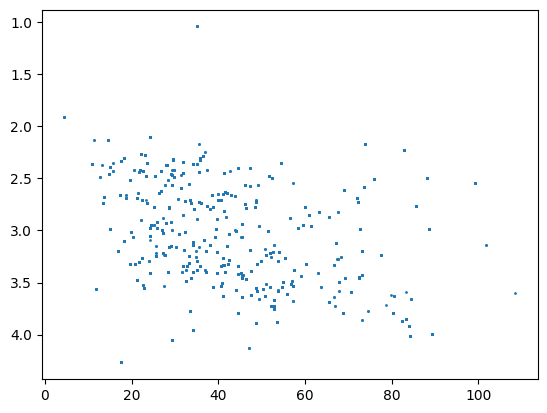

In [14]:
import matplotlib.pyplot as plt

# smaller points
plt.scatter(ds["data"]["MediumPhase"], ds["data"]["a0"], s=1)
plt.gca().invert_yaxis()

In [ ]:
from   lcdc import DatasetBuilder, LCDataset
from   lcdc.vars import Variability, TENTH_OF_SECOND, DataType as DT
import lcdc.preprocessing as pp
import lcdc.stats as stats

MMT_PATH = "/home/k/kyselica12/work/mmt/MMT"
IDX = 29517
classes = ["H-2A R/B"]
regexes = None
preprocessing = pp.Compose(
    pp.FilterByPeriodicity(Variability.PERIODIC),
    pp.SplitByRotationalPeriod(1), 
    pp.SplitBySize(10_000*TENTH_OF_SECOND),
    pp.FilterFolded(100, 0.75), 
    pp.FilterMinLength(100),
    pp.ToGrid(10, size=10_000),
)

statistics = []

db = DatasetBuilder(MMT_PATH, norad_ids=[IDX], preprocessing=preprocessing, statistics=statistics, lazy=False)
ds = db.to_dict(data_types=[DT.MAG])
ds["data"] = ds["data"].with_format("numpy", columns=["mag"])

Loaded 1 objects and 391 tracks


Preparing data: 100%|██████████| 306/306 [00:00<00:00, 72861.60it/s]
